<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2025-1/Laboratorios/Tarea_00_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Problema: Dataset de pingüinos: Este problema es entregable

Carga el sigiuente dataset y responde las siguientes preguntas:

```python
import pandas as pd
import seaborn as sns

# Cargar el dataset
df = sns.load_dataset('penguins')
```
Estas preguntas los guiarán a realizar un análisis descriptivo del dataset y a realizar un test de hipótesis.

## Primera aproximación a los datos de forma general y su limpieza:




















In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
df = sns.load_dataset('penguins')

In [2]:
print('Dimensiones:', df.shape)
df.head()

Dimensiones: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. ¿Cuántas especies diferentes de pingüinos hay en el dataset? ¿Que caracteristicas de los pinguinos se dan para cada especie? 

Cantidad de especies:  3


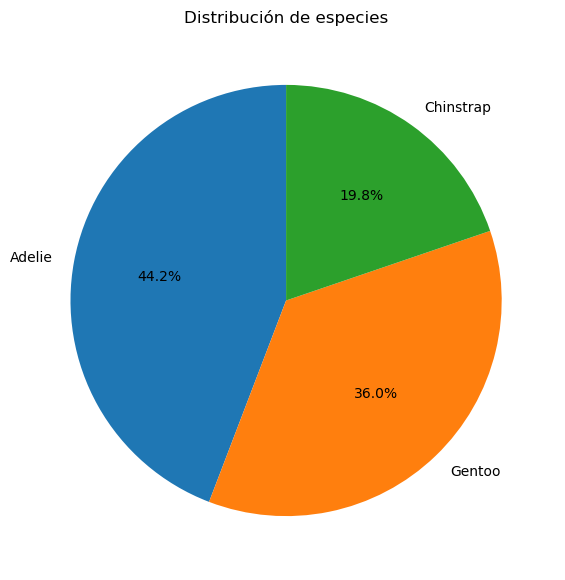

In [ ]:

# Contar ocurrencias de cada especie
species_counts = df['species'].value_counts()

print('Cantidad de especies: ', len(species_counts))


# Gráfico de pastel
plt.figure(figsize=(7,7))
plt.pie(
    species_counts, 
    labels=species_counts.index, 
    autopct='%1.1f%%', 
    startangle=90
)
plt.title('Distribución de especies')
plt.show()

In [ ]:
# Descripción por especie 
desc_by_species = df.groupby('species').describe().round(2)
desc_by_species

bill_length_mm                                                \
                   count   mean   std   min    25%    50%    75%   max   
species                                                                  
Adelie             151.0  38.79  2.66  32.1  36.75  38.80  40.75  46.0   
Chinstrap           68.0  48.83  3.34  40.9  46.35  49.55  51.08  58.0   
Gentoo             123.0  47.50  3.08  40.9  45.30  47.30  49.55  59.6   

          bill_depth_mm         ... flipper_length_mm        body_mass_g  \
                  count   mean  ...               75%    max       count   
species                         ...                                        
Adelie            151.0  18.35  ...             195.0  210.0       151.0   
Chinstrap          68.0  18.42  ...             201.0  212.0        68.0   
Gentoo            123.0  14.98  ...             221.0  231.0       123.0   

                                                                    
              mean     std     min     25%     50%     75%     max  
species                                                             
Adelie     3700.66  458.57  2850.0  3350.0  3700.0  4000.0  4775.0  
Chinstrap  3733.09  384.34  2700.0  3487.5  3700.0  3950.0  4800.0  
Gentoo     5076.02  504.12  3950.0  4700.0  5000.0  5500.0  6300.0  

[3 rows x 32 columns]

2. ¿Hay valores faltantes en las variables? Determine una estrategie de limpieza y apliquela.


In [6]:
# Detectar nulos por columna
missing = df.isnull().sum()
print('Valores faltantes por columna:\n', missing)

Valores faltantes por columna:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [7]:
df_clean = df.dropna().reset_index(drop=True)
print('Dimensiones después de limpieza:', df_clean.shape)

Dimensiones después de limpieza: (333, 7)


3. ¿Cuál es la isla con mayor número de pingüinos en el dataset? ¿Hay un desbalance en número en el número de pinguinos por isla?


island
Biscoe       163
Dream        123
Torgersen     47
Name: count, dtype: int64


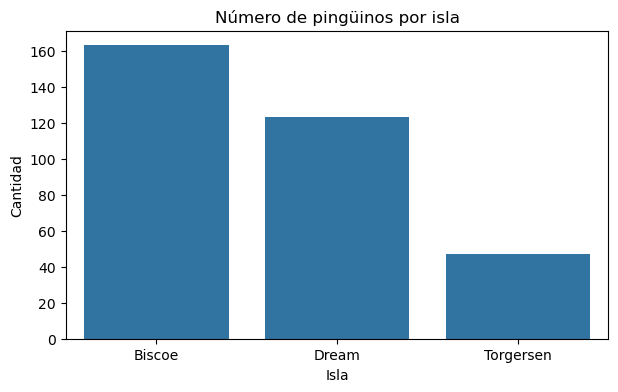

In [9]:
island_counts = df_clean['island'].value_counts()
print(island_counts)

plt.figure(figsize=(7,4))
sns.barplot(x=island_counts.index, y=island_counts.values)
plt.title('Número de pingüinos por isla')
plt.xlabel('Isla')
plt.ylabel('Cantidad')
plt.show()

4. Repita la pregunta anterior observando las especies.

<Figure size 900x500 with 0 Axes>

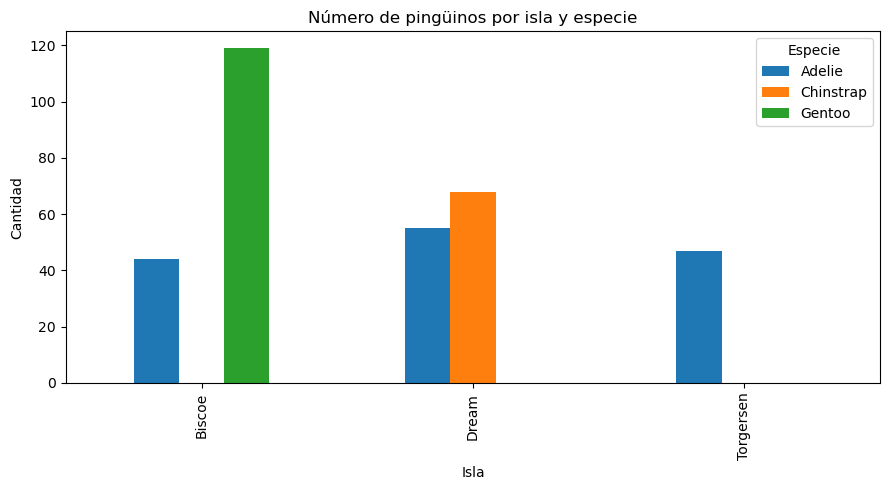

In [10]:
counts_island_species = df_clean.groupby(['island','species']).size().unstack(fill_value=0)
counts_island_species


plt.figure(figsize=(9,5))
counts_island_species.plot(kind='bar', stacked=False, figsize=(9,5))
plt.title('Número de pingüinos por isla y especie')
plt.xlabel('Isla')
plt.ylabel('Cantidad')
plt.legend(title='Especie')
plt.tight_layout()
plt.show()

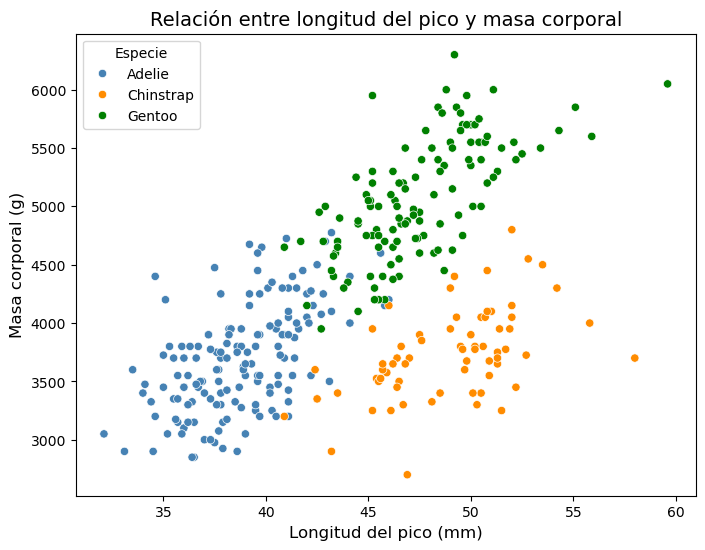

In [11]:
plt.figure(figsize=(8,6))

# Gráfico de dispersión
sns.scatterplot(
    data=df, 
    x='bill_length_mm', 
    y='body_mass_g', 
    hue='species', 
    palette={'Adelie': 'steelblue', 'Chinstrap': 'darkorange', 'Gentoo': 'green'}
)

plt.title('Relación entre longitud del pico y masa corporal', fontsize=14)
plt.xlabel('Longitud del pico (mm)', fontsize=12)
plt.ylabel('Masa corporal (g)', fontsize=12)
plt.legend(title='Especie')

plt.show()

## Tendencias y visualizacion de las variables

5. ¿Cuál es la longitud media y la desviacion estandard del tamaño del pico de los pingüinos por especie? 



In [12]:
bill_stats = df_clean.groupby('species')['bill_length_mm'].agg(['mean','std']).rename(columns={'mean':'media','std':'desviacion'}).round(2)
print(bill_stats)

           media  desviacion
species                     
Adelie     38.82        2.66
Chinstrap  48.83        3.34
Gentoo     47.57        3.11


6. ¿Qué pingüino tiene el pico más largo en el dataset y cuál es su especie?


In [14]:
idx = df_clean['bill_length_mm'].idxmax()
max_bill_row = df_clean.loc[idx]
print('Pico más largo:')
print(max_bill_row[['species','island','sex','bill_length_mm','bill_depth_mm','body_mass_g']])

Pico más largo:
species           Gentoo
island            Biscoe
sex                 Male
bill_length_mm      59.6
bill_depth_mm       17.0
body_mass_g       6050.0
Name: 246, dtype: object



7. ¿Como es la distribución de la masa corporal entre las especies de pingüinos? 


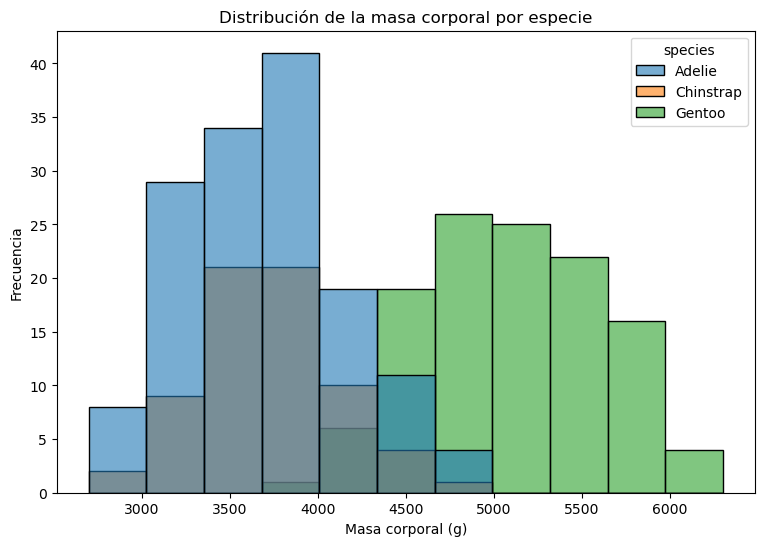

In [16]:
plt.figure(figsize=(9,6))
sns.histplot(data=df_clean, x='body_mass_g', hue='species', kde=False, alpha=0.6)
plt.title('Distribución de la masa corporal por especie')
plt.xlabel('Masa corporal (g)')
plt.ylabel('Frecuencia')
plt.show()

8. Describa la distribucion con ayuda de la media, desviacion estandard 
 

In [17]:
mass_stats = df_clean.groupby('species')['body_mass_g'].agg(['mean','std','median','min','max']).round(2)
print(mass_stats)

              mean     std  median     min     max
species                                           
Adelie     3706.16  458.62  3700.0  2850.0  4775.0
Chinstrap  3733.09  384.34  3700.0  2700.0  4800.0
Gentoo     5092.44  501.48  5050.0  3950.0  6300.0


9. ¿Cuál es la diferencia en masa corporal promedio y desviacion estandard entre machos y hembras? 



           mean     std  count
sex                           
Female  3862.27  666.17    165
Male    4545.68  787.63    168


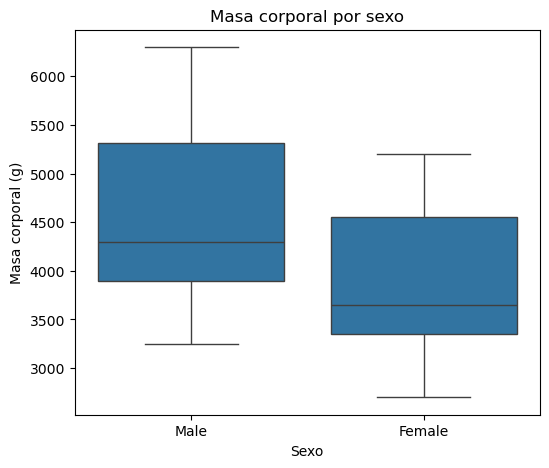

In [18]:
sex_mass = df_clean.groupby('sex')['body_mass_g'].agg(['mean','std','count']).round(2)
print(sex_mass)


# Gráfico
plt.figure(figsize=(6,5))
sns.boxplot(data=df_clean, x='sex', y='body_mass_g')
plt.title('Masa corporal por sexo')
plt.xlabel('Sexo')
plt.ylabel('Masa corporal (g)')
plt.show()

10. ¿Cuál es la media y la desviación estándar de la longitud de la aleta de los pingüinos por especie? 


In [19]:
flipper_stats = df_clean.groupby('species')['flipper_length_mm'].agg(['mean','std','min','max']).round(2)
print(flipper_stats)

             mean   std    min    max
species                              
Adelie     190.10  6.52  172.0  210.0
Chinstrap  195.82  7.13  178.0  212.0
Gentoo     217.24  6.59  203.0  231.0


11. ¿Cuál es la longitud mínima y máxima de la aleta entre las tres especies de pingüinos?


In [20]:
flipper_minmax = df_clean.groupby('species')['flipper_length_mm'].agg(['min','max']).round(2)
print(flipper_minmax)

             min    max
species                
Adelie     172.0  210.0
Chinstrap  178.0  212.0
Gentoo     203.0  231.0



12. ¿Cómo varía la longitud del pico entre las diferentes especies de pingüinos en las distintas islas?



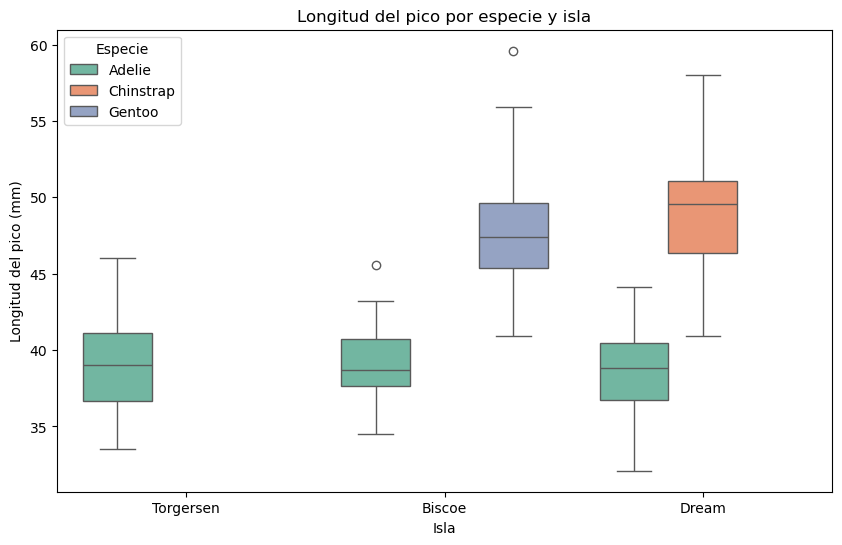

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='island', y='bill_length_mm', hue='species', palette='Set2')
plt.title('Longitud del pico por especie y isla')
plt.xlabel('Isla')
plt.ylabel('Longitud del pico (mm)')
plt.legend(title='Especie')
plt.show()

13. ¿Cuál es la isla con la mayor variación en la longitud del pico entre las tres especies de pingüinos?


In [22]:
island_bill_std = df_clean.groupby('island')['bill_length_mm'].std().round(2).sort_values(ascending=False)
print(island_bill_std)


# Además calcular rango (max-min)
island_bill_range = df_clean.groupby('island')['bill_length_mm'].agg(lambda x: x.max()-x.min()).round(2).sort_values(ascending=False)
print('\nRango por isla:', island_bill_range)

island
Dream        5.95
Biscoe       4.83
Torgersen    3.03
Name: bill_length_mm, dtype: float64

Rango por isla: island
Dream        25.9
Biscoe       25.1
Torgersen    12.5
Name: bill_length_mm, dtype: float64


## Relación entre caracteristicas de los pingüinos

14. ¿Cuál es la relación entre la longitud del pico y la masa corporal de los pingüinos? ¿Cambia esa relación si se mira por especie? Utilice diagramas de dispersión para visualizarlos.



In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='bill_length_mm', y='body_mass_g', hue='species', palette='Set1')
plt.title('Relación entre longitud del pico y masa corporal')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()


# Gráficos por especie
species_list = df_clean['species'].unique()
plt.figure(figsize=(15,4))
for i,s in enumerate(species_list,1):
plt.subplot(1,3,i)
tmp = df_clean[df_clean['species']==s]
sns.scatterplot(data=tmp, x='bill_length_mm', y='body_mass_g')
plt.title(f'{s}')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'for' statement on line 12 (3183424450.py, line 13)

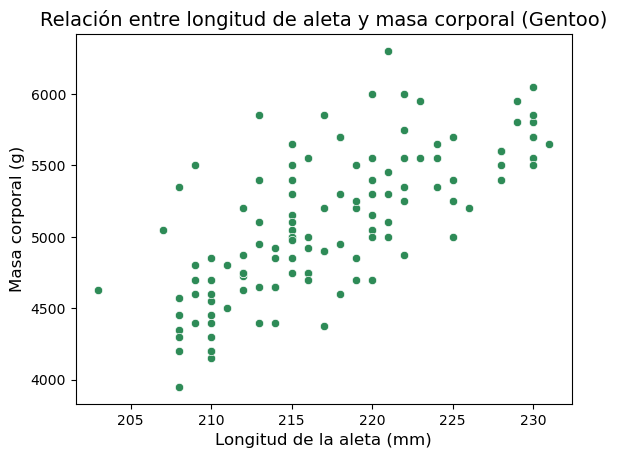

In [36]:

sns.scatterplot(
    data=gentoo_df, 
    x='flipper_length_mm', 
    y='body_mass_g', 
    color='seagreen'
)

# Títulos y etiquetas en español
plt.title('Relación entre longitud de aleta y masa corporal (Gentoo)', fontsize=14)
plt.xlabel('Longitud de la aleta (mm)', fontsize=12)
plt.ylabel('Masa corporal (g)', fontsize=12)

plt.show()

15. ¿Existe una correlación significativa entre la longitud del pico y la masa corporal en las diferentes especies de pingüinos?



In [27]:
from scipy import stats
corr_results = {}
for s in species_list:
    tmp = df_clean[df_clean['species']==s]
    r, p = stats.pearsonr(tmp['bill_length_mm'], tmp['body_mass_g'])
    corr_results[s] = {'r':round(r,3), 'p_value':round(p,5), 'n':len(tmp)}


corr_df = pd.DataFrame(corr_results).T
print(corr_df)

               r  p_value      n
Adelie     0.544  0.00000  146.0
Chinstrap  0.514  0.00001   68.0
Gentoo     0.667  0.00000  119.0


16. ¿Cuál es la relación entre el sexo y la longitud de la aleta en los pingüinos por especie?





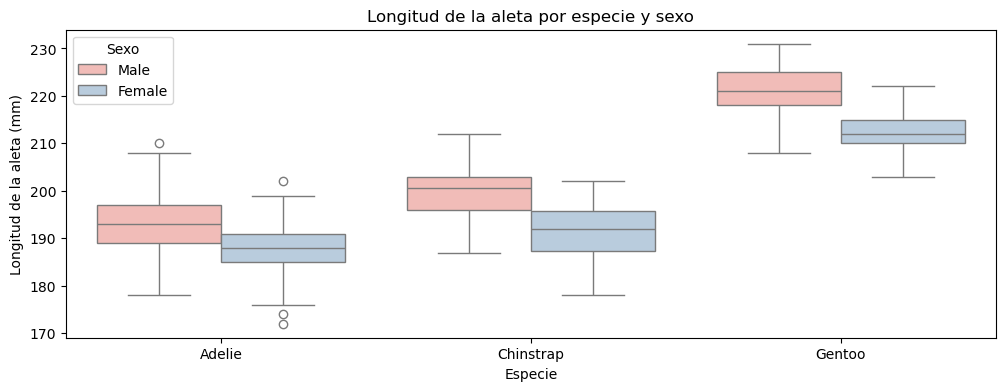

mean   std  count
species   sex                        
Adelie    Female  187.79  5.60     73
          Male    192.41  6.60     73
Chinstrap Female  191.74  5.75     34
          Male    199.91  5.98     34
Gentoo    Female  212.71  3.90     58
          Male    221.54  5.67     61

In [28]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df_clean, x='species', y='flipper_length_mm', hue='sex', palette='Pastel1')
plt.title('Longitud de la aleta por especie y sexo')
plt.xlabel('Especie')
plt.ylabel('Longitud de la aleta (mm)')
plt.legend(title='Sexo')
plt.show()


# Estadísticas por especie y sexo
sex_flipper = df_clean.groupby(['species','sex'])['flipper_length_mm'].agg(['mean','std','count']).round(2)
sex_flipper

## Test de hipótesis

17. Escoja una de las tendencias que haya observado en la cual haya una correlación entre las variables y ahora con un test de hipótesis determine si esta correlación puede ser explicada por aleatoriedad. Para esta pregunta puede usar las relaciones del libro "Probabilidad y Estadistica" de Marques de Cantu sección 12.6 donde hay un ejemplo 12.8 que les guia como usar las expresiones y hacer las conclusiones.

Usamos prueba de correlación de Pearson y evaluamos p-valor (alpha=0.05).

Seleccionamos la especie con mayor n para el test (General: "Adelie" o la que tenga mayor n)

Especie seleccionada para el test: Adelie
Pearson r = 0.544, p-valor = 0.00000, n = 146
Rechazamos H0: existe evidencia de correlación significativa (p < 0.05)


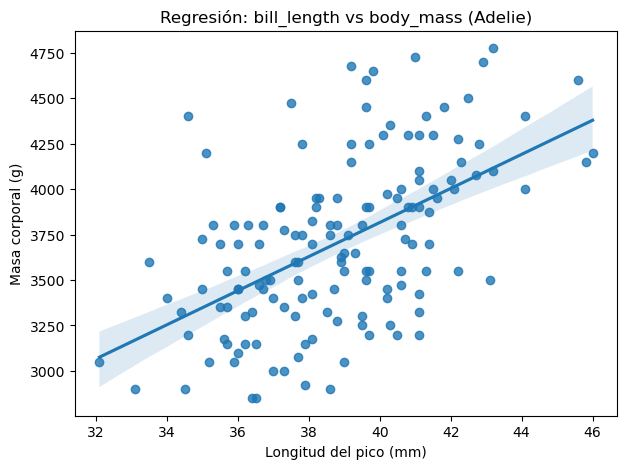


Conclusión: usar el p-valor de Pearson para decidir si la correlación observada se puede explicar por aleatoriedad.


In [ ]:

selected = df_clean['species'].value_counts().idxmax()
print('Especie seleccionada para el test:', selected)


tmp = df_clean[df_clean['species']==selected]
# Pearson
r, p = stats.pearsonr(tmp['bill_length_mm'], tmp['body_mass_g'])
print(f'Pearson r = {r:.3f}, p-valor = {p:.5f}, n = {len(tmp)}')


alpha = 0.05
if p < alpha:
    print('Rechazamos H0: existe evidencia de correlación significativa (p < 0.05)')
else:
    print('No rechazamos H0: no hay evidencia suficiente para afirmar correlación (p >= 0.05)')


# Visualizar con línea de regresión
plt.figure(figsize=(7,5))
sns.regplot(data=tmp, x='bill_length_mm', y='body_mass_g', ci=95)
plt.title(f'Regresión: bill_length vs body_mass ({selected})')
plt.xlabel('Longitud del pico (mm)')
plt.ylabel('Masa corporal (g)')
plt.show()


# Conclusión breve impresa
print('\nConclusión: usar el p-valor de Pearson para decidir si la correlación observada se puede explicar por aleatoriedad.')